## Project: TMDb Movie analysis
Table of Contents
<br> • Introduction
<br> • Data Wrangling
<br> • Exploratory Data Analysis
<br> • Conclusions

Introduction
The dataset that has been selected for analysis is the TMDb movie data. The dataset contains information about 10,000 movies collected from The Movie Database (TMDb), including user ratings and revenue.

We shall wrangle the data and carry out an EDA to investigate some interesting questions. We shall make extensive use of matplotlib and some inferential statistics to figure out trends in the data.

The findings shall be communicated through a pdf document.

## Introduction
The dataset that has been selected for analysis is the TMDb movie data. The dataset contains information about 10,000 movies collected from The Movie Database (TMDb), including user ratings and revenue.

We shall wrangle the data and carry out an EDA to investigate some interesting questions. We shall make extensive use of matplotlib and some inferential statistics to figure out trends in the data.

The findings shall be communicated through a pdf document.

## Questions for investigation:
It has been suspected that globalization has led to increased cross-cultural interactions. This particularly manifests in movies as different culture can be physically rendered via films. Is this true? Has there been an increase in the number of movies over the years?
<br> • Which **genres** have been most common over the years?
<br> • Which **genres** have been most common from year to year?
<br> • How does the budget of a movie affected by the genre? Are their certain genres which require a higher budget than others?
<br> • How has the **popularity** of movies varied with genres? Are their certain genres which have had higher popularity than the others?
<br> • How does running time of the movie impact it's popularity? Have people started to prefer short films over long films?
<br> • What is the correlation between popularity and the budget of the movie? Do popular movies tend to have higher budgets?
<br> • What is the correlation between popularity and the the profits of a movie? Do popular movies always have high profits?
<br> • How does the genre of the film affect the profit margins? Do certain genres tend to fetch greater profits?
<br> • How does the production house affect the popularity of the movie? Are certain producers likely to produce a more popular movie than the other, seeing the positive correlation between budget and popularity?

In [13]:
# Use this cell to set up import statements for all of the packages that you
#   plan to use.
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb

## Data Wrangling

In [7]:
# Load your data and print out a few lines. Perform operations to inspect data
#   types and look for instances of missing or possibly errant data.
df = pd.read_csv('tmdb_movies_data.csv')
df.head()

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/2015,5562,6.5,2015,137999939.3,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/2015,6185,7.1,2015,137999939.3,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/2015,2480,6.3,2015,101199955.5,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/2015,5292,7.5,2015,183999919.0,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/2015,2947,7.3,2015,174799923.1,1.385749e+09


General Properties
There are 10866 entries/rows and 21 columns in the dataset

Most of the numeric data is clean.

Select numerical variables are available for investigation and most of them seem useful.

Data Cleaning
*Common problems*

From the information available, it can be noticed that there are columns which do not have complete data. For example, production companies, homepage and tag lines aren't available for most movies.

Moreover, there are data columns that don't require for answering the questions posed. Thus, there lies imperative deletion of these columns.

Duplicates may be present in the system dataset, making it inevitable to be dealt with.

Filling in missing values also becomes a necessity. Following this, duplicate checks are done and their deletion or combination is done cirucumstantially. If there is presence of columns with different data, the rows would have to be combined.

Some columns need to be renamed for simplicty of reference.

In [8]:
# First we drop undesired columns.
df.drop(['tagline', 'overview', 'keywords', 'release_date', 'homepage'], axis = 1, inplace = True)

In [9]:
df.columns # Undesired columns have been deleted 

Index(['id', 'imdb_id', 'popularity', 'budget', 'revenue', 'original_title',
       'cast', 'director', 'runtime', 'genres', 'production_companies',
       'vote_count', 'vote_average', 'release_year', 'budget_adj',
       'revenue_adj'],
      dtype='object')

In [10]:
# Now we check for duplicates
df.duplicated().sum()

1

In [11]:
df.drop_duplicates(inplace = True) # Duplicates have been dropped
df.duplicated().sum()

0

In [12]:
# we rename some columns for simplicity
df.rename(columns = {'production_companies' : 'producers'}, inplace = True)
df.columns

Index(['id', 'imdb_id', 'popularity', 'budget', 'revenue', 'original_title',
       'cast', 'director', 'runtime', 'genres', 'producers', 'vote_count',
       'vote_average', 'release_year', 'budget_adj', 'revenue_adj'],
      dtype='object')

## Exploratory Data Analysis

**It has been suspected that globalization has led to increased cross-cultural interactions. This particularly manifests in movies as different culture can be physically rendered via films. Is this true? Has there been an increase in the number of movies over the years?**

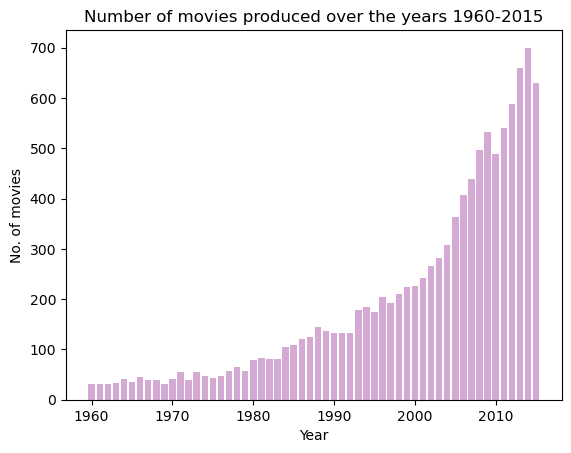

In [14]:
x = df['release_year'].value_counts()
plt.title('Number of movies produced over the years 1960-2015')
plt.xlabel('Year')
plt.ylabel('No. of movies')
plt.bar(x.index, x.values, color = 'purple', alpha = 1/3);

## **Which genres have been most common over the years?**

In [15]:
df['genres'].value_counts().nlargest(3)

Comedy         712
Drama          712
Documentary    312
Name: genres, dtype: int64

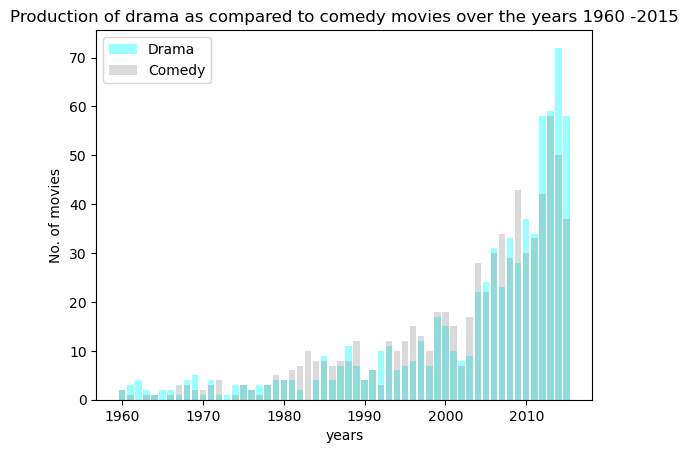

In [16]:
plt.title('Production of drama as compared to comedy movies over the years 1960 -2015')
plt.xlabel('years')
plt.ylabel('No. of movies')
x = df[df['genres'] == 'Drama']['release_year'].value_counts()
plt.bar(x.index, x.values, alpha = 0.4, color = 'cyan', label = 'Drama');
x = df[df['genres'] == 'Comedy']['release_year'].value_counts()
plt.bar(x.index, x.values, alpha = 0.29, color = 'grey', label = 'Comedy');
plt.legend();

## **Which has been the most common genre from year to year?**

In [17]:
x = df.groupby('release_year')['genres'].value_counts()
x.groupby('release_year').nlargest(1)

release_year  release_year  genres                        
1960          1960          Horror                             3
1961          1961          Drama                              3
1962          1962          Drama                              4
1963          1963          Horror                             3
1964          1964          Comedy|Romance                     5
1965          1965          Action|Adventure|Drama|Western     2
1966          1966          Action|Western                     3
1967          1967          Comedy|Drama|Romance               4
1968          1968          Drama                              4
1969          1969          Drama                              5
1970          1970          Horror                             4
1971          1971          Drama                              4
1972          1972          Comedy                             4
1973          1973          Crime|Drama                        3
1974          1974          Com

## **How does the budget of a movie affected by the genre? Are their certain genres which require a higher budget than others?**

/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


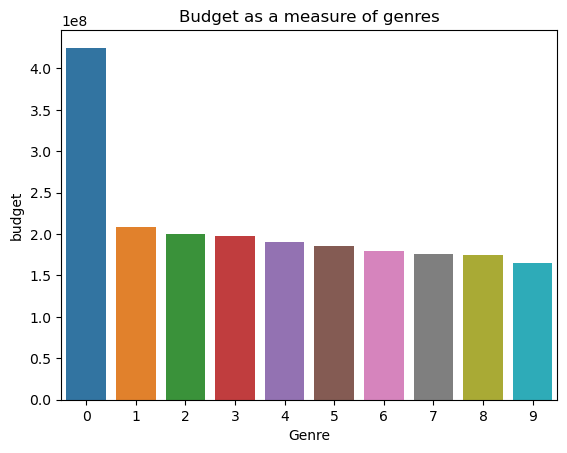

In [18]:
plt.title('Budget as a measure of genres')
plt.xlabel('Genre')
plt.ylabel('Budget in 10 millions')
sb.barplot(np.arange(0, 10), df.groupby('genres')['budget'].mean().nlargest(10));

In [19]:
df.groupby('genres')['budget'].mean().nlargest(10) # corresponding tick labels

genres
Adventure|Fantasy|Action|Western|Thriller          425000000.0
Thriller|Action|Adventure|Science Fiction          209000000.0
Family|Fantasy|Adventure                           200000000.0
Adventure|Action|Fantasy                           198000000.0
Action|Family|Science Fiction|Adventure|Mystery    190000000.0
Animation|Adventure|Comedy|Family|Action           185000000.0
Fantasy|Adventure|Action|Family|Romance            180000000.0
Science Fiction|Fantasy|Action|Adventure           176000003.0
War|Adventure|Drama                                175000000.0
Adventure|Family|Animation|Action|Comedy           165000000.0
Name: budget, dtype: float64

## **How has the popularity of movies varied with genres? Are their certain genres which have had higher popularity than the others?**

/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


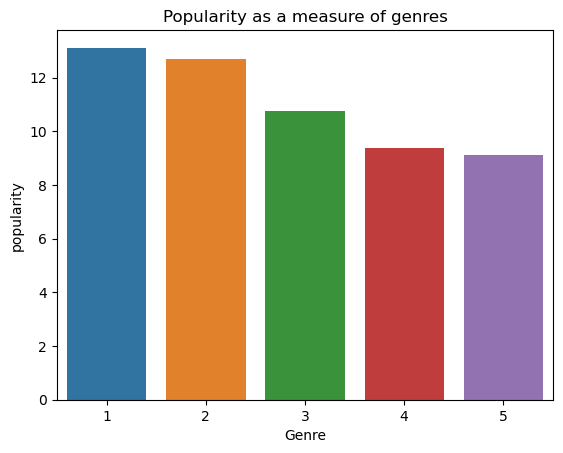

In [22]:
plt.title('Popularity as a measure of genres')
plt.xlabel('Genre')
plt.ylabel('Mean Popularity')
sb.barplot([1, 2, 3, 4, 5], df.groupby('genres')['popularity'].mean().nlargest());

In [23]:
df.groupby('genres')['popularity'].mean().nlargest() # Corresponding tick labels

genres
Adventure|Science Fiction|Thriller                   13.112507
Adventure|Drama|Science Fiction                      12.699699
Science Fiction|Adventure|Thriller                   10.739009
Action|Thriller|Science Fiction|Mystery|Adventure     9.363643
Western|Drama|Adventure|Thriller                      9.110700
Name: popularity, dtype: float64

## **How does running time of the movie impact it's popularity? Have people started to prefer short films over long films?**

In [24]:
df['runtime'].describe()

count    10865.000000
mean       102.071790
std         31.382701
min          0.000000
25%         90.000000
50%         99.000000
75%        111.000000
max        900.000000
Name: runtime, dtype: float64

In [25]:
short_films = df.query('runtime < {}'.format(99)) # Segregation into long and short films based on the median
long_films = df.query('runtime >= {}'.format(99))


In [26]:
sf_popularity = short_films['popularity'].mean() # Calculating mean popularity of each group
lf_popularity = long_films['popularity'].mean() 

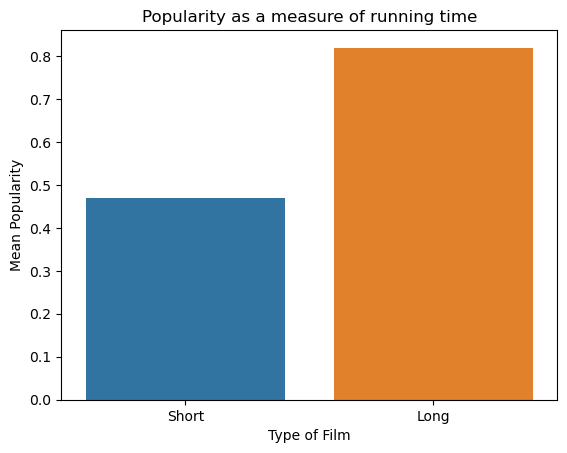

In [27]:
plt.title('Popularity as a measure of running time')
plt.xlabel('Type of Film')
plt.ylabel('Mean Popularity')
sb.barplot(x = ['Short', 'Long'], y = [sf_popularity, lf_popularity]);

## **What is the correlation between popularity and the budget of the movie? Do popular movies tend to have higher budgets ?**

<AxesSubplot:xlabel='popularity', ylabel='budget'>

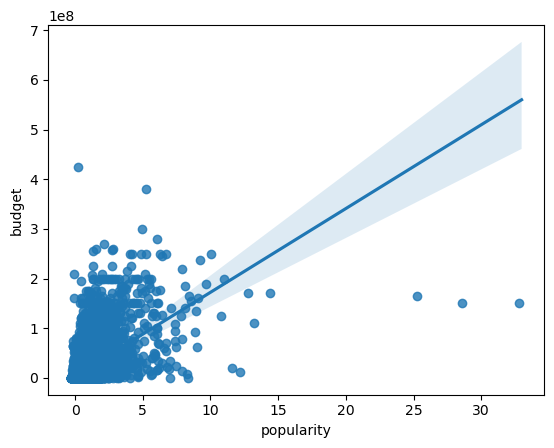

In [28]:
sb.regplot(x = df['popularity'], y =  df['budget'], x_jitter = 1/3, y_jitter = 1/3)

## **What is the correlation between popularity and the the profits of a movie? Do popular movies always have high profits?**

In [29]:
df['profit'] = df['revenue'] - df['budget']
df.head()

,id,imdb_id,popularity,budget,revenue,original_title,cast,director,runtime,genres,producers,vote_count,vote_average,release_year,budget_adj,revenue_adj,profit
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,5562,6.5,2015,137999939.3,1.392446e+09,1363528810
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,George Miller,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,6185,7.1,2015,137999939.3,3.481613e+08,228436354
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,Robert Schwentke,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,2480,6.3,2015,101199955.5,2.716190e+08,185238201
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,J.J. Abrams,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,5292,7.5,2015,183999919.0,1.902723e+09,1868178225
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,James Wan,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,2947,7.3,2015,174799923.1,1.385749e+09,1316249360


/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


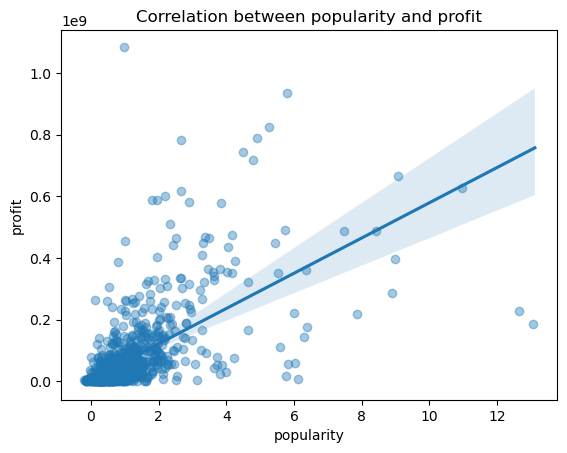

In [30]:
x = df.groupby('genres').mean()
x = x.iloc[:, [1, 10]]
x = x[x['profit']> 0]
plt.title('Correlation between popularity and profit')
sb.regplot(x.iloc[:, 0], x.iloc[:, 1], x_jitter = 1/3, y_jitter = 1/3, scatter_kws = {'alpha' : 0.4});

## **How does the genre of the film affect the profit margins? Do certain genres tend to fetch greater profits?**

/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


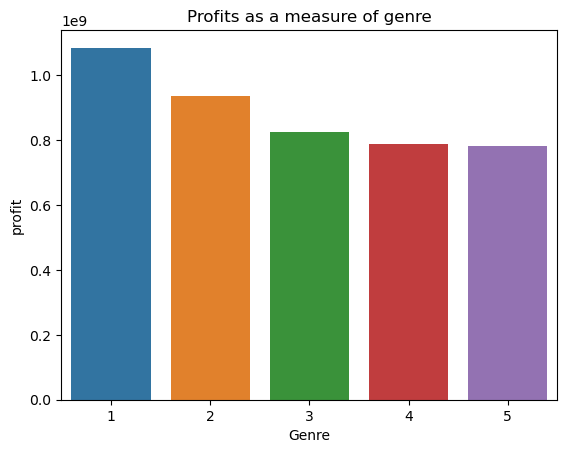

In [31]:
plt.title('Profits as a measure of genre')
plt.xlabel('Genre')
plt.ylabel('Profit')
sb.barplot([1, 2, 3, 4, 5], x['profit'].nlargest(5));


In [32]:
x['profit'].nlargest(5) # Corresponding tick labels

genres
Crime|Drama|Mystery|Thriller|Action         1.084280e+09
Action|Adventure|Science Fiction|Fantasy    9.340891e+08
Family|Fantasy|Adventure                    8.254671e+08
Adventure|Fantasy|Family|Mystery            7.882127e+08
Science Fiction|Adventure|Family|Fantasy    7.824106e+08
Name: profit, dtype: float64

## **How does the production house affect the popularity of the movie? Are certain producers likely to produce a more popular movie than the other, seeing the positive correlation between budget and popularity?**

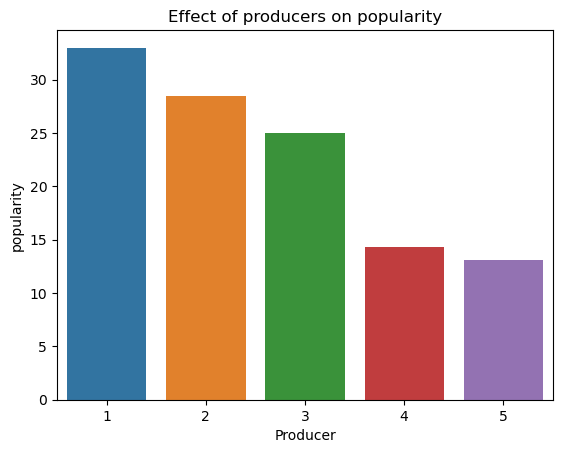

In [33]:
plt.title('Effect of producers on popularity')
plt.xlabel('Producer')
plt.ylabel('Popularity')
sb.barplot(x = [1, 2, 3, 4, 5], y = df.groupby('producers')['popularity'].mean().nlargest(5));

In [34]:
df.groupby('producers')['popularity'].mean().nlargest(5) # Corresponding tick labels

producers
Universal Studios|Amblin Entertainment|Legendary Pictures|Fuji Television Network|Dentsu    32.985763
Village Roadshow Pictures|Kennedy Miller Productions                                        28.419936
Paramount Pictures|Legendary Pictures|Warner Bros.|Syncopy|Lynda Obst Productions           24.949134
Marvel Studios|Moving Picture Company (MPC)|Bulletproof Cupid|Revolution Sun Studios        14.311205
Summit Entertainment|Mandeville Films|Red Wagon Entertainment|NeoReel                       13.112507
Name: popularity, dtype: float64

## **End of Project**